In [113]:
import pandas as pd
from IPython.display import display, HTML
%load_ext autoreload
%autoreload 2

import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
csv_file = open("uaScoresDataFrame.csv")
scores = pd.read_csv(csv_file)
scores = scores.drop('id', axis=1)
scores = scores.drop('Venture Capital', axis=1)

In [115]:
def check_zero(dataset):
    invalid_rows = []
    for element in dataset.columns.tolist():
        invalid = dataset[dataset[element] == 0.0]
        invalid_rows.append(invalid[['UA_Name','UA_Country']])
    df = pd.concat(invalid_rows).reset_index(drop=True).value_counts()
    return df
results = check_zero(scores).to_frame().reset_index().rename(columns={0:"number"})
print(results)

                       UA_Name               UA_Country  number
0                      Andorra                  Andorra       6
1                    Gibraltar                Gibraltar       5
2                      Managua                Nicaragua       3
3                     Tashkent               Uzbekistan       3
4                  Belize City                   Belize       3
5                       Panama                   Panama       3
6                    Palo Alto               California       2
7                       La Paz                  Bolivia       2
8                     Portland                    Maine       2
9                       Havana                     Cuba       2
10                     Fukuoka                    Japan       2
11                    San Juan              Puerto Rico       2
12                     Bozeman                  Montana       2
13                   Baltimore                 Maryland       2
14                    Valletta          

In [116]:
scores = scores[(scores != 0).all(1)]

In [117]:
weights_data = {
    'Housing' : 1.5,
    'Cost of Living' : 1.5,
    'Startups' : 0.5,
    'Business Freedom' : 0.8,
    'Safety' : 1.5,
    'Healthcare' : 1.5,
    'Education' : 0.5,
    'Travel Connectivity' : 1.5,
}

weights_vector = pd.Series(0.0, index=scores.columns[3:-1])
for i in range(len(weights_vector)):
    row_name = weights_vector.index[i]
    weights_vector[i] = weights_data.get(row_name, 1)

In [118]:
summable_values = list(scores)
if 'Naive Sum' in summable_values:
    summable_values.remove('Naive Sum')
weighted_scores = scores.copy()
weighted_scores = weighted_scores * weights_vector
scores['Naive Sum'] = weighted_scores[summable_values].sum(numeric_only=True, axis=1)

In [119]:
# scores['Naive Sum']
# better, worse

midpoint = scores['Naive Sum'].quantile()
scores['Label'] = ''
scores.loc[scores['Naive Sum'] < midpoint, 'Label'] = 'worse'
scores.loc[scores['Naive Sum'] >= midpoint, 'Label'] = 'better'

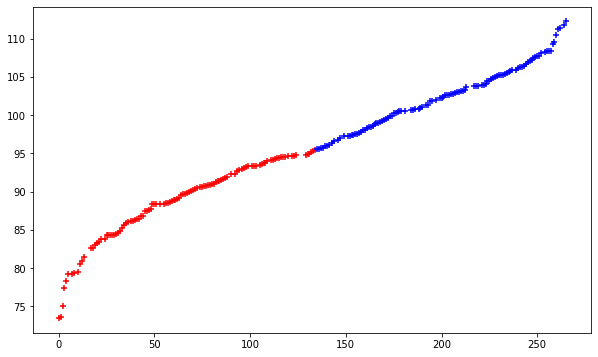

In [120]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
vals = scores['Naive Sum'].sort_values()
colors = np.where(vals >= midpoint, 'b', 'r')
ax.scatter(scores.index, vals, c=colors, marker='+')

In [121]:
from Modules.dataprocessing import ProcessingData
ProcessingData.normalize(scores)
a, b = ProcessingData.prepare_data(scores)

preview_table = pd.concat([a.head(), b.head()])

In [131]:
from itertools import product
import Modules.fuzzytesting as test
from Modules.fuzzytesting import FuzzyTest
importlib.reload(test)
import Modules.fuzzysys as fsys
from Modules.norms import ZadehNorm
from Modules.membership_functions import TriangularFunction, TrapezoidalFunction
importlib.reload(fsys)
import Modules.rule as rule
from Modules.rule import RuleCondition as R
importlib.reload(rule)

from Modules.norms import ZadehNorm, ExtendedMangerNorm

ling1 = 'Bad'
ling2 = 'Mid'
ling3 = 'Good'

fuzzy = fsys.FuzzySystem()
fuzzy.add_antecedent('Housing', ling1, TriangularFunction(0, 0.3, 0.55))
fuzzy.add_antecedent('Housing', ling2, TriangularFunction(0.5, 0.6, 0.7))
fuzzy.add_antecedent('Housing', ling3, TriangularFunction(0.6, 0.8, 1))

fuzzy.add_antecedent('Cost of Living', ling1, TriangularFunction(0, 0.25, 0.47))
fuzzy.add_antecedent('Cost of Living', ling2, TriangularFunction(0.4, 0.55, 0.7))
fuzzy.add_antecedent('Cost of Living', ling3, TriangularFunction(0.6, 0.75, 1))

fuzzy.add_antecedent('Safety', ling1, TriangularFunction(0, 0.3, 0.6))
fuzzy.add_antecedent('Safety', ling2, TriangularFunction(0.5, 0.6, 0.7))
fuzzy.add_antecedent('Safety', ling3, TriangularFunction(0.6, 0.8, 1))

fuzzy.add_antecedent('Healthcare', ling1, TriangularFunction(0, 0.25, 0.5))
fuzzy.add_antecedent('Healthcare', ling2, TriangularFunction(0.4, 0.6, 0.8))
fuzzy.add_antecedent('Healthcare', ling3, TriangularFunction(0.7, 0.85, 1))

fuzzy.add_antecedent('Travel Connectivity', ling1, TrapezoidalFunction(0, 0.07, 0.14, 0.2))
fuzzy.add_antecedent('Travel Connectivity', ling2, TrapezoidalFunction(0.15, 0.25, 0.33, 0.4))
fuzzy.add_antecedent('Travel Connectivity', ling3, TrapezoidalFunction(0.35, 0.5, 0.7, 1))

fuzzy.add_antecedent('Commute', ling1, TrapezoidalFunction(0, 0.23, 0.46, 0.7))
fuzzy.add_antecedent('Commute', ling2, TrapezoidalFunction(0.6, 0.67, 0.74, 0.8))
fuzzy.add_antecedent('Commute', ling3, TrapezoidalFunction(0.7, 0.8, 0.9, 1))

fuzzy.add_antecedent('Education', ling1, TriangularFunction(0, 0.2, 0.4))
fuzzy.add_antecedent('Education', ling2, TriangularFunction(0.3, 0.42, 0.5))
fuzzy.add_antecedent('Education', ling3, TriangularFunction(0.4, 0.7, 1))

fuzzy.add_antecedent('Environmental Quality', ling1, TriangularFunction(0, 0.25, 0.5))
fuzzy.add_antecedent('Environmental Quality', ling2, TriangularFunction(0.45, 0.52, 0.7))
fuzzy.add_antecedent('Environmental Quality', ling3, TriangularFunction(0.6, 0.8, 1))

fuzzy.add_antecedent('Economy', ling1, TriangularFunction(0, 0.25, 0.5))
fuzzy.add_antecedent('Economy', ling2, TriangularFunction(0.4, 0.5, 0.6))
fuzzy.add_antecedent('Economy', ling3, TriangularFunction(0.5, 0.75, 1))

fuzzy.add_antecedent('Taxation', ling1, TrapezoidalFunction(0, 0.13, 0.26, 0.4))
fuzzy.add_antecedent('Taxation', ling2, TrapezoidalFunction(0.3, 0.37, 0.44, 0.5))
fuzzy.add_antecedent('Taxation', ling3, TrapezoidalFunction(0.4, 0.6, 0.8, 1))

fuzzy.add_antecedent('Internet Access', ling1, TriangularFunction(0, 0.2, 0.4))
fuzzy.add_antecedent('Internet Access', ling2, TriangularFunction(0.3, 0.45, 0.6))
fuzzy.add_antecedent('Internet Access', ling3, TriangularFunction(0.5, 0.75, 1))

fuzzy.add_antecedent('Leisure & Culture', ling1, TriangularFunction(0, 0.25, 0.5))
fuzzy.add_antecedent('Leisure & Culture', ling2, TriangularFunction(0.4, 0.52, 0.7))
fuzzy.add_antecedent('Leisure & Culture', ling3, TriangularFunction(0.6, 0.8, 1))

fuzzy.add_rule((R('Housing', ling3) & R('Cost of Living', ling3) & R('Safety', ling3)) | (R('Housing', ling3) & R('Cost of Living', ling3) & R('Healthcare', ling3)) | (R('Housing', ling3) & R('Cost of Living', ling3) & R('Travel Connectivity', ling3)) | (R('Housing', ling3) & R('Safety', ling3) & R('Healthcare', ling3)) | (R('Housing', ling3) & R('Safety', ling3) & R('Travel Connectivity', ling3)) | (R('Housing', ling3) & R('Healthcare', ling3) & R('Travel Connectivity', ling3)) | (R('Healthcare', ling3) & R('Cost of Living', ling3) & R('Safety', ling3)) | (R('Travel Connectivity', ling3) & R('Cost of Living', ling3) & R('Safety', ling3)) | (R('Housing', ling3) & R('Cost of Living', ling3) & R('Safety', ling3)) | (R('Healthcare', ling3) & R('Cost of Living', ling3) & R('Travel Connectivity', ling3)) | (R('Safety', ling3) & R('Cost of Living', ling3) & R('Travel Connectivity', ling3)) | (R('Healthcare', ling3) & R('Cost of Living', ling3) & R('Travel Connectivity', ling3)) | (R('Travel Connectivity', ling3) & R('Healthcare', ling3) & R('Safety', ling3)),ling3)
fuzzy.add_rule((R('Housing', ling2) & R('Cost of Living', ling2) & R('Safety', ling2)) | (R('Housing', ling2) & R('Cost of Living', ling2) & R('Healthcare', ling2)) | (R('Housing', ling2) & R('Cost of Living', ling2) & R('Travel Connectivity', ling2)) | (R('Housing', ling2) & R('Safety', ling2) & R('Healthcare', ling2)) | (R('Housing', ling2) & R('Safety', ling2) & R('Travel Connectivity', ling2)) | (R('Housing', ling2) & R('Healthcare', ling2) & R('Travel Connectivity', ling2)) | (R('Healthcare', ling2) & R('Cost of Living', ling2) & R('Safety', ling2)) | (R('Travel Connectivity', ling2) & R('Cost of Living', ling2) & R('Safety', ling2)) | (R('Housing', ling2) & R('Cost of Living', ling2) & R('Safety', ling2)) | (R('Healthcare', ling2) & R('Cost of Living', ling2) & R('Travel Connectivity', ling2)) | (R('Safety', ling2) & R('Cost of Living', ling2) & R('Travel Connectivity', ling2)) | (R('Healthcare', ling2) & R('Cost of Living', ling2) & R('Travel Connectivity', ling2)) | (R('Travel Connectivity', ling2) & R('Healthcare', ling2) & R('Safety', ling2)),ling2)
fuzzy.add_rule((R('Housing', ling1) & R('Cost of Living', ling1) & R('Safety', ling1)) | (R('Housing', ling1) & R('Cost of Living', ling1) & R('Healthcare', ling1)) | (R('Housing', ling1) & R('Cost of Living', ling1) & R('Travel Connectivity', ling1)) | (R('Housing', ling1) & R('Safety', ling1) & R('Healthcare', ling1)) | (R('Housing', ling1) & R('Safety', ling1) & R('Travel Connectivity', ling1)) | (R('Housing', ling1) & R('Healthcare', ling1) & R('Travel Connectivity', ling1)) | (R('Healthcare', ling1) & R('Cost of Living', ling1) & R('Safety', ling1)) | (R('Travel Connectivity', ling1) & R('Cost of Living', ling1) & R('Safety', ling1)) | (R('Housing', ling1) & R('Cost of Living', ling1) & R('Safety', ling1)) | (R('Healthcare', ling1) & R('Cost of Living', ling1) & R('Travel Connectivity', ling1)) | (R('Safety', ling1) & R('Cost of Living', ling1) & R('Travel Connectivity', ling1)) | (R('Healthcare', ling1) & R('Cost of Living', ling1) & R('Travel Connectivity', ling1)) | (R('Travel Connectivity', ling1) & R('Healthcare', ling1) & R('Safety', ling1)),ling1)
fuzzy.add_rule(((((R('Housing', ling3) & ~R('Cost of Living', ling3) & ~R('Safety', ling3) & ~R('Healthcare', ling3) & ~R('Travel Connectivity', ling3)) | (~R('Housing', ling3) & R('Cost of Living', ling3) & ~R('Safety', ling3) & ~R('Healthcare', ling3) & ~R('Travel Connectivity', ling3)) | (~R('Housing', ling3) & ~R('Cost of Living', ling3) & R('Safety', ling3) & ~R('Healthcare', ling3) & ~R('Travel Connectivity', ling3)) | (~R('Housing', ling3) & ~R('Cost of Living', ling3) & ~R('Safety', ling3) & R('Healthcare', ling3) & ~R('Travel Connectivity', ling3)) | (~R('Housing', ling3) & ~R('Cost of Living', ling3) & ~R('Safety', ling3) & ~R('Healthcare', ling3) & R('Travel Connectivity', ling3))) & ((R('Commute', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Internet Access', ling3) & R('Leisure & Culture', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Internet Access', ling3) & R('Education', ling3) & R('Leisure & Culture', ling3) & R('Environmental Quality', ling3) & R('Taxation', ling3)) | (R('Internet Access', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Leisure & Culture', ling3)) | (R('Leisure & Culture', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Internet Access', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Internet Access', ling3) & R('Leisure & Culture', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Internet Access', ling3) & R('Environmental Quality', ling3) & R('Leisure & Culture', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Internet Access', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Leisure & Culture', ling3)) | (R('Commute', ling3) & R('Leisure & Culture', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Internet Access', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Internet Access', ling3) & R('Leisure & Culture', ling3) & R('Taxation', ling3)) & (R('Commute', ling3) & R('Education', ling3) & R('Internet Access', ling3) & R('Economy', ling3) & R('Leisure & Culture', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Leisure & Culture', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Internet Access', ling3) & R('Economy', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Internet Access', ling3) & R('Leisure & Culture', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Leisure & Culture', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Internet Access', ling3) & R('Taxation', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Leisure & Culture', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Internet Access', ling3)) | (R('Commute', ling3) & R('Education', ling3) & R('Environmental Quality', ling3) & R('Economy', ling3) & R('Taxation', ling3))))),ling3)
fuzzy.add_rule(((((R('Housing', ling2) & ~R('Cost of Living', ling2) & ~R('Safety', ling2) & ~R('Healthcare', ling2) & ~R('Travel Connectivity', ling2)) | (~R('Housing', ling2) & R('Cost of Living', ling2) & ~R('Safety', ling2) & ~R('Healthcare', ling2) & ~R('Travel Connectivity', ling2)) | (~R('Housing', ling2) & ~R('Cost of Living', ling2) & R('Safety', ling2) & ~R('Healthcare', ling2) & ~R('Travel Connectivity', ling2)) | (~R('Housing', ling2) & ~R('Cost of Living', ling2) & ~R('Safety', ling2) & R('Healthcare', ling2) & ~R('Travel Connectivity', ling2)) | (~R('Housing', ling2) & ~R('Cost of Living', ling2) & ~R('Safety', ling2) & ~R('Healthcare', ling2) & R('Travel Connectivity', ling2))) & ((R('Commute', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Internet Access', ling2) & R('Leisure & Culture', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Internet Access', ling2) & R('Education', ling2) & R('Leisure & Culture', ling2) & R('Environmental Quality', ling2) & R('Taxation', ling2)) | (R('Internet Access', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Leisure & Culture', ling2)) | (R('Leisure & Culture', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Internet Access', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Internet Access', ling2) & R('Leisure & Culture', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Internet Access', ling2) & R('Environmental Quality', ling2) & R('Leisure & Culture', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Internet Access', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Leisure & Culture', ling2)) | (R('Commute', ling2) & R('Leisure & Culture', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Internet Access', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Internet Access', ling2) & R('Leisure & Culture', ling2) & R('Taxation', ling2)) & (R('Commute', ling2) & R('Education', ling2) & R('Internet Access', ling2) & R('Economy', ling2) & R('Leisure & Culture', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Leisure & Culture', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Internet Access', ling2) & R('Economy', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Internet Access', ling2) & R('Leisure & Culture', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Leisure & Culture', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Internet Access', ling2) & R('Taxation', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Leisure & Culture', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Internet Access', ling2)) | (R('Commute', ling2) & R('Education', ling2) & R('Environmental Quality', ling2) & R('Economy', ling2) & R('Taxation', ling2))))),ling2)
fuzzy.add_rule(((((R('Housing', ling1) & ~R('Cost of Living', ling1) & ~R('Safety', ling1) & ~R('Healthcare', ling1) & ~R('Travel Connectivity', ling1)) | (~R('Housing', ling1) & R('Cost of Living', ling1) & ~R('Safety', ling1) & ~R('Healthcare', ling1) & ~R('Travel Connectivity', ling1)) | (~R('Housing', ling1) & ~R('Cost of Living', ling1) & R('Safety', ling1) & ~R('Healthcare', ling1) & ~R('Travel Connectivity', ling1)) | (~R('Housing', ling1) & ~R('Cost of Living', ling1) & ~R('Safety', ling1) & R('Healthcare', ling1) & ~R('Travel Connectivity', ling1)) | (~R('Housing', ling1) & ~R('Cost of Living', ling1) & ~R('Safety', ling1) & ~R('Healthcare', ling1) & R('Travel Connectivity', ling1))) & ((R('Commute', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Internet Access', ling1) & R('Leisure & Culture', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Internet Access', ling1) & R('Education', ling1) & R('Leisure & Culture', ling1) & R('Environmental Quality', ling1) & R('Taxation', ling1)) | (R('Internet Access', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Leisure & Culture', ling1)) | (R('Leisure & Culture', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Internet Access', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Internet Access', ling1) & R('Leisure & Culture', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Internet Access', ling1) & R('Environmental Quality', ling1) & R('Leisure & Culture', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Internet Access', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Leisure & Culture', ling1)) | (R('Commute', ling1) & R('Leisure & Culture', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Internet Access', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Internet Access', ling1) & R('Leisure & Culture', ling1) & R('Taxation', ling1)) & (R('Commute', ling1) & R('Education', ling1) & R('Internet Access', ling1) & R('Economy', ling1) & R('Leisure & Culture', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Leisure & Culture', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Internet Access', ling1) & R('Economy', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Internet Access', ling1) & R('Leisure & Culture', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Leisure & Culture', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Internet Access', ling1) & R('Taxation', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Leisure & Culture', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Internet Access', ling1)) | (R('Commute', ling1) & R('Education', ling1) & R('Environmental Quality', ling1) & R('Economy', ling1) & R('Taxation', ling1))))),ling1)

fuzzy.add_consequent('Bad', TriangularFunction(0, 0, 0.4))
fuzzy.add_consequent('Mid', TriangularFunction(0.3, 0.5, 0.8))
fuzzy.add_consequent('Good', TriangularFunction(0.7, 1, 1))

for (norm, defuzz_method) in product([ZadehNorm, ExtendedMangerNorm], ['fom', 'mom', 'lom', 'centroid']):
    fuzzy_test = FuzzyTest(norm=norm(), defuzzification_method=defuzz_method)
    fuzzy_test.run(fuzzy, pd.concat([a, b]))

FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = fom, THRESHOLD = 70
 > accuracy: 78.8%
 > recall: 69.0%
 > specificity: 88.5%
 > precision: 85.7%
----------------------------------------------------------------------------------
FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = mom, THRESHOLD = 70
 > accuracy: 79.2%
 > recall: 71.7%
 > specificity: 86.7%
 > precision: 84.4%
----------------------------------------------------------------------------------
FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = lom, THRESHOLD = 70
 > accuracy: 69.5%
 > recall: 92.9%
 > specificity: 46.0%
 > precision: 63.3%
----------------------------------------------------------------------------------
FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = centroid, THRESHOLD = 70
 > accuracy: 79.2%
 > recall: 71.7%
 > specificity: 86.7%
 > precision: 84.4%
----------------------------------------------------------------------------------
FOR NORM = ExtendedMangerNorm, DEFUZZIFICATION METHOD = fom, THRESHOLD = 70
 > accu

In [123]:
scores[scores.UA_Name=='Dallas']

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Travel Connectivity,Commute,Business Freedom,Safety,...,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Naive Sum,Label
72,Dallas,Texas,North America,0.473222,0.565667,0.771056,0.436138,0.619321,0.815902,0.346041,...,0.410813,0.637355,0.645634,0.39025,0.626549,0.685389,0.458681,0.53841,0.534593,worse


In [124]:
d2 = {
    'Housing': {
        'linguistic': 'Mid',
        'numerical': 0.5
    },
    'Startups': {
        'linguistic': 'Bad',
        'numerical': 0.1
    }
}
r = ~(R('Housing', 'Mid') & R('Startups', 'Bad'))
print(r.evaluate(d2))

0.95


In [125]:
student = ['Commute', 'Education', 'Environmental Quality', 'Economy', 'Taxation', 'Internet Access', 'Leisure & Culture']
for element in student:
    print(element)
    print(scores[element].describe())

Commute
count    226.000000
mean       0.699696
std        0.184982
min        0.000000
25%        0.635663
50%        0.737609
75%        0.817848
max        1.000000
Name: Commute, dtype: float64
Education
count    226.000000
mean       0.407454
std        0.210492
min        0.000000
25%        0.339214
50%        0.422755
75%        0.526015
max        1.000000
Name: Education, dtype: float64
Environmental Quality
count    226.000000
mean       0.597109
std        0.237380
min        0.000000
25%        0.402418
50%        0.647282
75%        0.789579
max        1.000000
Name: Environmental Quality, dtype: float64
Economy
count    226.000000
mean       0.486514
std        0.171030
min        0.000000
25%        0.360959
50%        0.512971
75%        0.645634
max        1.000000
Name: Economy, dtype: float64
Taxation
count    226.000000
mean       0.405032
std        0.195222
min        0.000000
25%        0.290938
50%        0.388821
75%        0.528167
max        1.000000
Name: T